In [6]:
import os
import pandas as pd

### PROCESSING/ ANALYZE DATA

In [4]:
path = './aivncovid-19/train-public/public_train_metadata.csv'

metadata = pd.read_csv(path, encoding='utf-8')

metadata.head(10)

,uuid,subject_age,subject_gender,audio_noise_note,cough_intervals,assessment_result
0,fc802bee-ef01-4496-a898-d7e77c0017e9,group_34_48,male,NaN,NaN,0
1,9341db3f-049a-4ceb-8438-87ca1618a18a,group_34_48,male,NaN,"[{'start': 1.9051594202898552, 'end': 2.414901...",0
2,307e7a8b-b312-409e-ac01-75e1260b0a95,group_19_33,male,NaN,NaN,0
3,ff8c21a8-4d05-43d8-96ee-dd33bcd6461e,group_19_33,male,NaN,"[{'end': 1.516455486542442, 'start': 1.1739296...",0
4,2e9d68e1-e84e-4aa5-8199-e7b0bbe6969f,group_19_33,male,NaN,NaN,0
5,e8053ae9-a019-4cdd-9d18-8458f0a09a09,group_19_33,male,NaN,"[{'start': 0.41484500670241203, 'end': 0.58217...",0
6,14bd2f13-f53c-457c-a462-96b97ff9157f,group_34_48,male,NaN,"[{'end': 1.3760000000000001, 'start': 0.982857...",0
7,9a55aef7-ed77-45ab-976e-411aade1c783,group_19_33,male,"tiếng nói chuyện, trao đổi","[{'start': 2.393298134459697, 'end': 2.7450841...",0
8,5499d71b-509e-4588-8bd1-e7522f61d770,group_19_33,female,NaN,NaN,0
9,75c1dc6b-8253-401c-84d1-bbb6c1e910a1,group_34_48,male,NaN,"[{'end': 1.576944545260461, 'start': 1.2533940...",0


In [10]:
audio_path = './aivncovid-19/train-public/audios/'
abs_audio_path = os.path.abspath(audio_path)
print(abs_audio_path)

metadata['path'] = metadata['uuid'].apply(lambda x: f"{abs_audio_path}/{x}.wav")

/home/phucphan/fakerphan/AI-Covid-19/data/aivncovid-19/train-public/audios


In [16]:
data_df = metadata[['path', 'assessment_result']]

data_df = data_df.rename(columns={"assessment_result": "label"})

In [18]:
data_df.groupby(["label"]).count()

,path
label,
0,3825
1,679


In [19]:
from sklearn.model_selection import train_test_split

In [22]:
train_df, test_df = train_test_split(
    data_df, test_size=0.1, stratify=data_df['label'], random_state=123)

In [23]:
len(train_df), len(test_df)

(4053, 451)

In [25]:
# TODO: Save to .csv file

train_df.to_csv('././aivncovid-19/train-public/train_meta.csv', encoding='utf-8', index=False)
test_df.to_csv('././aivncovid-19/train-public/test_meta.csv', encoding='utf-8', index=False)

### ANALYZE AUDIO

In [26]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [43]:
FIG_SIZE = (15,10)

file = data_df['path'][0]
# file = '../../arizona-spotting/data/VISC_v0.2b/train/active/visc_v0.2b_1.wav'

# load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)

Text(0.5,1,'Waveform')

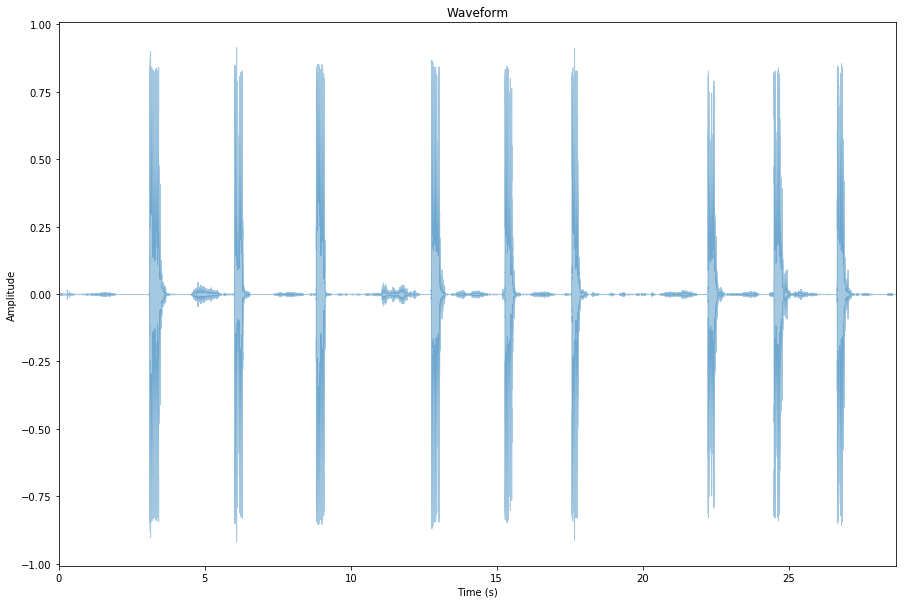

In [44]:
# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
# plt.savefig('figs/waveform.png')

Text(0,0.5,'Magnitude')

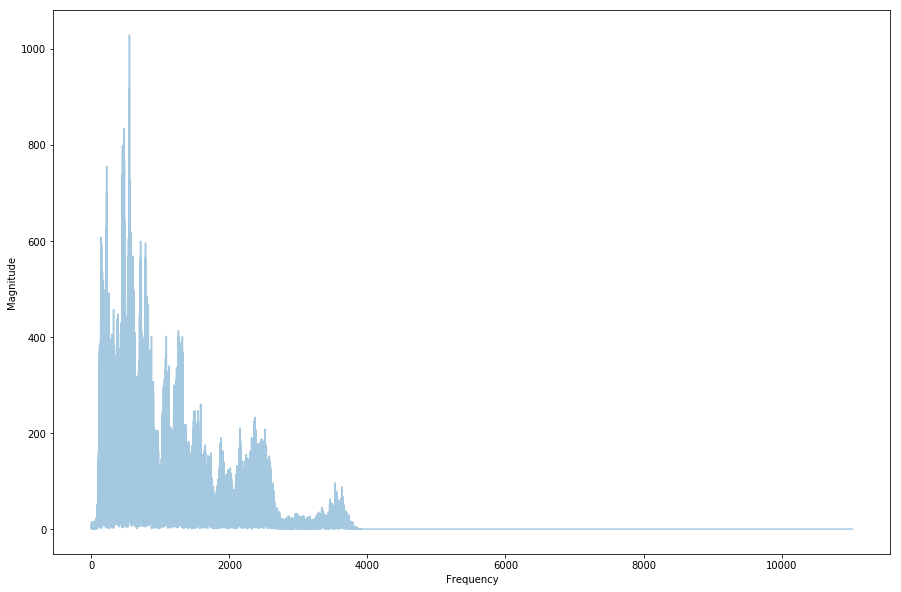

In [45]:
# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)

# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
# plt.title("Power spectrum")

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5,1,'Spectrogram')

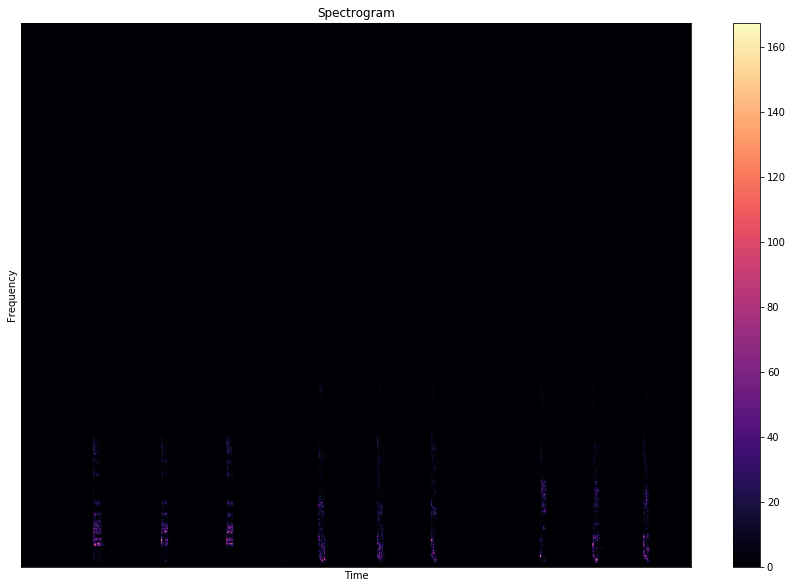

In [46]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")
# plt.savefig('figs/spectrogram.png')

(1025, 1235)


Text(0.5,1,'Spectrogram (dB)')

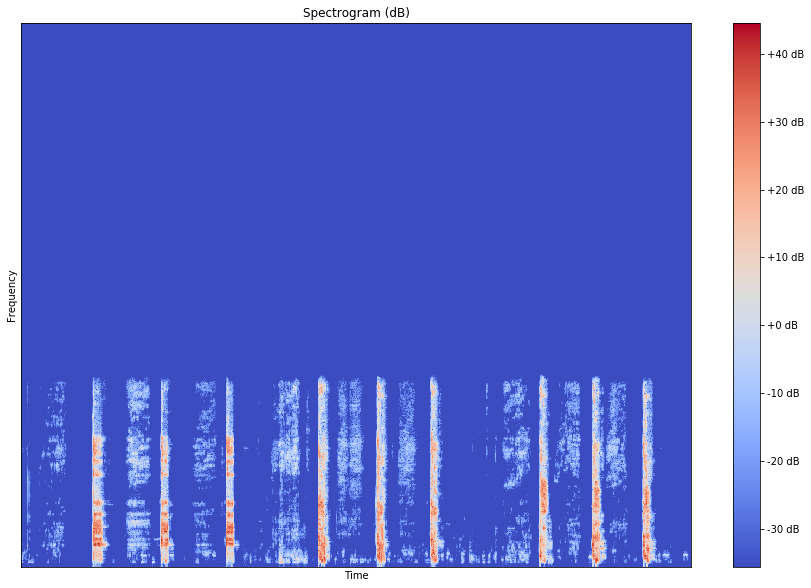

In [47]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
print(log_spectrogram.shape)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
# plt.savefig('figs/log_spectrogram.png')

Text(0.5,1,'MFCCs')

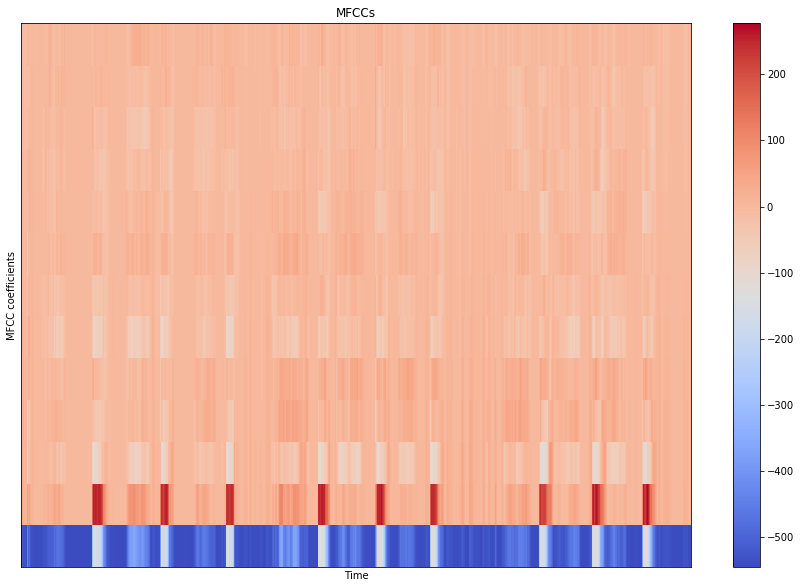

In [48]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
# plt.savefig('figs/MFCC.png')